In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from simtk import unit
import molmodmt as m3t
import openpocket as opp
import nglview as nv
import matplotlib.pyplot as plt

/home/diego/Myusr/opt/miniconda3/envs/UIBCDF_lab_dev/lib/python3.7/site-packages/yank-0.24.2-py3.7-linux-x86_64.egg/yank/experiment.py:1170: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """)


_ColormakerRegistry()

## Índice
- ¿Qué son las alfa-esferas?
- ¿Cómo se clusterizan?

## 2D example

Random compact figure 2D made by hard discs:

In [3]:
radius = 1.0 * unit.angstroms
n_discs = 10

positions = np.zeros(shape=(n_discs,2),dtype=float) * unit.angstroms

for ii in range(1, n_discs):
    done = False
    while done is False:
        disc_in_contact = np.random.randint(0,ii)
        angle = 2*np.pi*np.random.random() # angulo aleatorio
        new_center = 2*radius*np.array([np.cos(angle), np.sin(angle)])+positions[disc_in_contact,:]
        done=True
        for jj in range(ii):
            dist= np.linalg.norm(positions[jj,:]-new_center) * unit.angstroms
            if dist < 2*radius:
                done=False
                break
        if done is True:
            positions[ii,:]=new_center


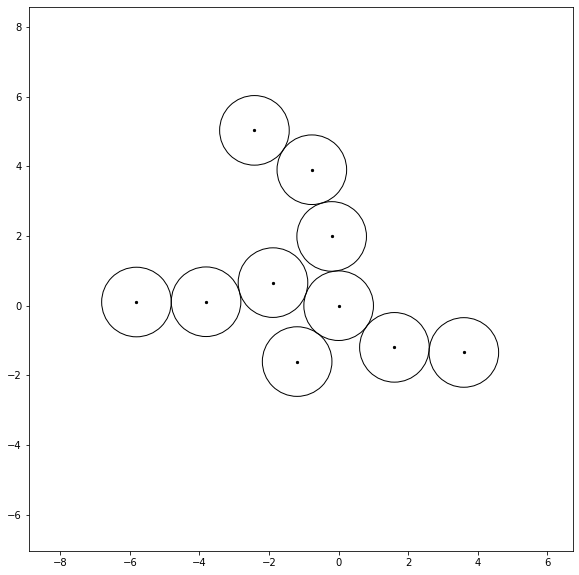

In [4]:
plt.rcParams["figure.figsize"] = (10,10)

ax=plt.gca()
for ii in range(n_discs):
    x,y = positions[ii,:]._value
    ax.add_patch(plt.Circle(positions[ii,:]._value, radius= radius._value, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius._value
center = positions.mean(0)._value
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()


### Voronoi diagrams

Voronoi diagrams helps us to geometrically make a first a proach. We can determine those disks in the surface of the molecule and those in the core.

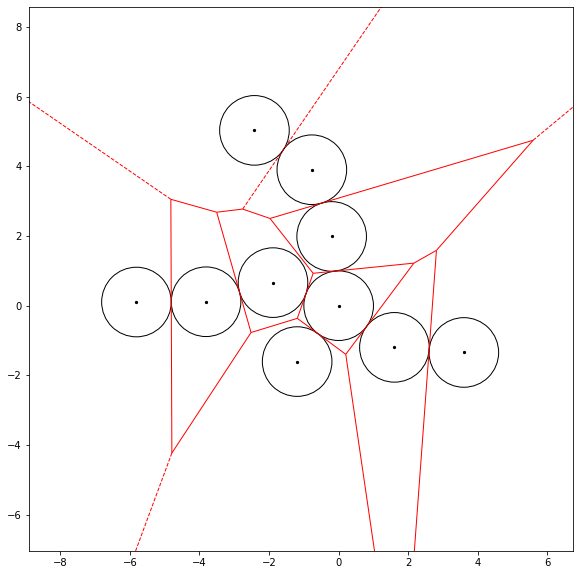

In [5]:
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(positions, incremental=False)

voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r', s=4)
ax=plt.gca()
for ii in range(n_discs):
    x,y = positions[ii,:]._value
    ax.add_patch(plt.Circle(positions[ii,:]._value, radius= radius._value, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius._value
center = positions.mean(0)._value
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

See also:    
https://www.daniweb.com/programming/computer-science/tutorials/520314/how-to-make-quality-voronoi-diagrams    
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.Voronoi.html    


## Dellanuy triangulation


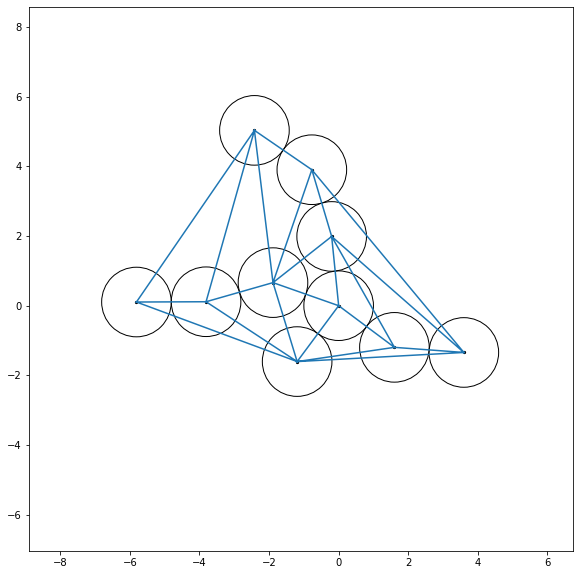

In [6]:
from scipy.spatial import Delaunay

tri = Delaunay(positions)

plt.triplot(positions[:,0], positions[:,1], tri.simplices)

ax=plt.gca()
for ii in range(n_discs):
    x,y = positions[ii,:]._value
    ax.add_patch(plt.Circle(positions[ii,:]._value, radius= radius._value, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius._value
center = positions.mean(0)._value
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

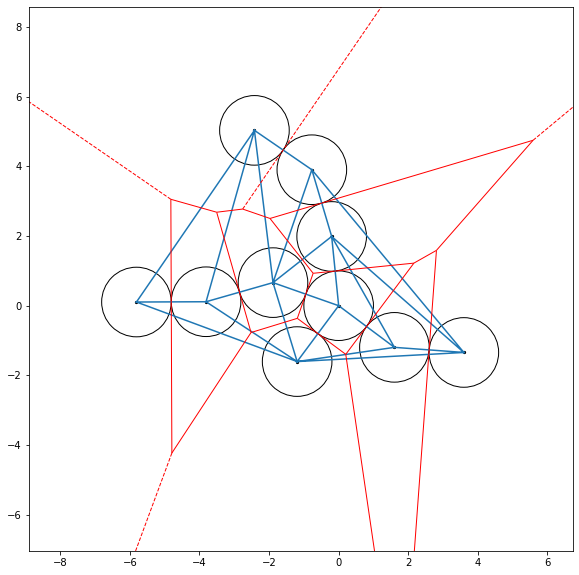

In [7]:
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r')

plt.triplot(positions[:,0], positions[:,1], tri.simplices)

ax=plt.gca()
for ii in range(n_discs):
    x,y = positions[ii,:]._value
    ax.add_patch(plt.Circle(positions[ii,:]._value, radius= radius._value, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius._value
center = positions.mean(0)._value
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

## Convex Hull

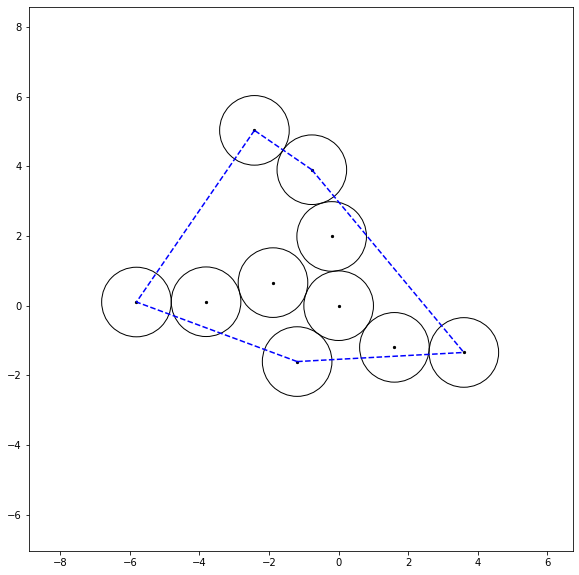

In [8]:
from scipy.spatial import ConvexHull

hull = ConvexHull(positions)

for simplex in hull.simplices:
    plt.plot(positions[simplex, 0], positions[simplex, 1], 'b--')

ax=plt.gca()
for ii in range(n_discs):
    x,y = positions[ii,:]._value
    ax.add_patch(plt.Circle(positions[ii,:]._value, radius= radius._value, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius._value
center = positions.mean(0)._value
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

## Alpha spheres

Lets see the meaning of voronoi vertices:

In [9]:
vor.vertices

array([[ -1.18767901,  -0.36342502],
       [  1.79173136, -12.25479672],
       [  0.20433127,  -1.39755226],
       ...,
       [  5.58643089,   4.75315795],
       [  2.81008911,   1.59005751],
       [  2.16167233,   1.22315812]])

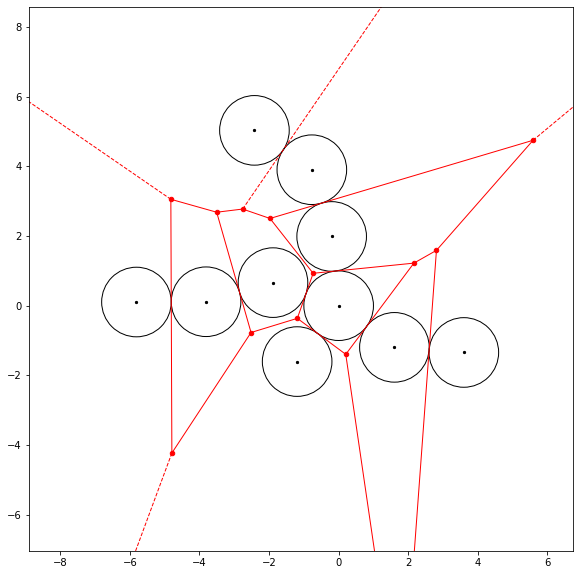

In [10]:
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r')

plt.scatter(vor.vertices[:,0], vor.vertices[:,1], s=20, c='red')

ax=plt.gca()
for ii in range(n_discs):
    x,y = positions[ii,:]._value
    ax.add_patch(plt.Circle(positions[ii,:]._value, radius= radius._value, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius._value
center = positions.mean(0)._value
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

Cada vertice está a la misma distancia de tres puntos. Cada vertice esta formado necesariamente por tres celdas adyacentes. Cada una con un centro que estará en la alfa-circunferencia.

In [11]:
vor.vertices

array([[ -1.18767901,  -0.36342502],
       [  1.79173136, -12.25479672],
       [  0.20433127,  -1.39755226],
       ...,
       [  5.58643089,   4.75315795],
       [  2.81008911,   1.59005751],
       [  2.16167233,   1.22315812]])

In [12]:
vor.regions # cada region está cercada por unos vertices expresados por las siguientes listas

[[],
 [7, 5, 4, 6],
 [5, 0, 2, 1, -1, 4],
 [6, -1, 4],
 [7, 3, -1, 6],
 [12, 8, 9, 10, 11],
 [9, 3, 7, 5, 0, 8],
 [12, 2, 0, 8],
 [10, -1, 3, 9],
 [11, 1, -1, 10],
 [12, 2, 1, 11]]

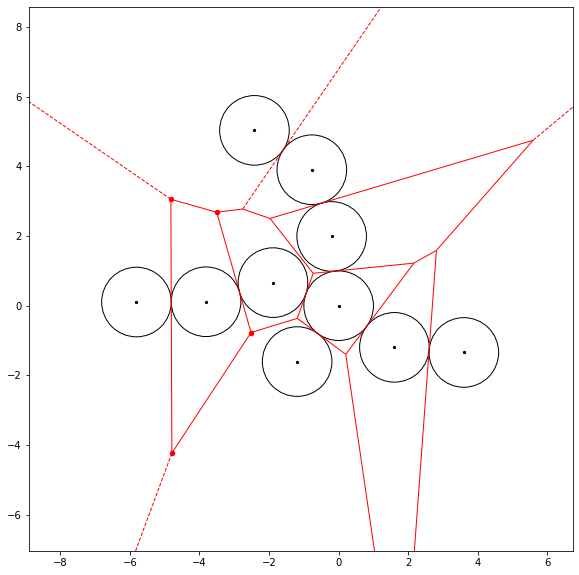

In [14]:
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r')

for ii in vor.regions[1]:
    plt.scatter(vor.vertices[ii,0], vor.vertices[ii,1], s=20, c='red')

ax=plt.gca()
for ii in range(n_discs):
    x,y = positions[ii,:]._value
    ax.add_patch(plt.Circle(positions[ii,:]._value, radius= radius._value, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius._value
center = positions.mean(0)._value
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

In [15]:
vor.point_region

array([ 7,  6,  1, 10,  3,  9,  2,  5,  8,  4])

## Notes
- What if the sphere radius are different? Repeat this with 4 classes of discs (4 different radius)
- The cavities need to allocate something inside. There is no reason to work with aisolated spheres of radius smaller than a disc (atom)

## 3D Alpha Spheres with OpenPocket

Lets define 4 points in space:

In [ ]:
positions = np.zeros(shape=(4,3),dtype=float) * unit.angstroms

positions[0,:] = [-1.0, 2.0, 0.0] * unit.angstroms
positions[1,:] = [0.0, 2.0, 1.0] * unit.angstroms
positions[2,:] = [1.0, -2.0, 1.0] * unit.angstroms
positions[3,:] = [0.0, 1.0, 1.0] * unit.angstroms

We can obtain the set of alpha spheres defined by the coordinates of those 4 points. With the class `AlphSpheresSet` we can instance an object given an array of 3D coordinates:

In [ ]:
alpha_spheres_set = opp.alpha_spheres.AlphaSpheresSet(positions)

The new object has some useful methods and attributes regarding the resultant alpha-spheres set. Lets check, for instance, the number of alpha spheres obtained with our 4 points:

In [ ]:
alpha_spheres_set.n_alpha_spheres

As expected, there is only one alpha sphere. Lets print out now the center and radius of the first and unique alpha sphere of the set:

In [ ]:
print('The only alpha-sphere has its center in {} and a radius of {} length.'.format(
    alpha_spheres_set.centers[0], alpha_spheres_set.radii[0]))

We can also wonder what points of the input points distribution are in contact with an specific alpha sphere of the set. In this case is trivial, since there is only 4 points and 1 alpha sphere:

In [ ]:
alpha_spheres_set.points_in_surface[0]

At last, lets see the sphere and the 4 points in a spatial representation:

In [ ]:
view = nv.NGLWidget()

for index in range(alpha_spheres_set.n_points):
    atom_coordinates = alpha_spheres_set.points[index,:]._value
    view.shape.add_sphere(list(atom_coordinates), [0.8,0.0,0.0], 0.2)

for index in range(alpha_spheres_set.n_alpha_spheres):
    sphere_coordinates = alpha_spheres_set.centers[index,:]._value
    sphere_radius = alpha_spheres_set.radii[index]._value
    view.shape.add_sphere(list(sphere_coordinates), [0.8,0.8,0.8], sphere_radius)
    
view

As we already knew, 4 points define a single alpha sphere by construction. Lets increase the number of points to 6 to see what happens:

In [ ]:
positions = np.zeros(shape=(6,3),dtype=float) * unit.angstroms

positions[0,:] = [-1.0, 2.0, 0.0] * unit.angstroms
positions[1,:] = [0.0, 2.0, 1.0] * unit.angstroms
positions[2,:] = [1.0, -2.0, 1.0] * unit.angstroms
positions[3,:] = [0.0, 1.0, 1.0] * unit.angstroms
positions[4,:] = [0.0, 0.0, 0.0] * unit.angstroms
positions[5,:] = [-1.0, -1.0, 0.0] * unit.angstroms

In [ ]:
positions

In [ ]:
alpha_spheres_set = opp.alpha_spheres.AlphaSpheresSet(positions)

In [ ]:
alpha_spheres_set.n_alpha_spheres

Now we have 4 alpha spheres. We can check centers and radii:

In [ ]:
alpha_spheres_set.centers

In [ ]:
alpha_spheres_set.radii

Lets visualize the points and resultant alpha spheres:

In [ ]:
alpha_spheres_set.view()

We can also visualize only a list of alpha sphere indices with their corresponding points in contact

In [ ]:
alpha_spheres_set.view([1,3])

What are the indices of the points shown in the above figure? What are the indices of the points in the surface of alpha spheres 1th and 3th?

In [ ]:
alpha_spheres_set.get_points_in_surfaces([1,3])